In [1]:
using QuantumOptics
using PyPlot
using LaTeXStrings
using Random
using DelimitedFiles
using NPZ, Printf
using LinearAlgebra
using DifferentialEquations
using SpecialFunctions
using SparseArrays
using StatsBase

In [76]:
fockmax = 10
b = FockBasis(fockmax)
a = destroy(b)

κ = 0.01
Δc = 1.
dt=0.001
tspan = dt*collect(1:100000)

C = 2*sqrt(κ)*a
H0 = Δc*dagger(a)*a

ψ0 = coherentstate(b,0.7);

In [77]:
θ = 0.5π
Hs = 1.0im*C*exp(-1.0im*θ)
Y = C*exp(-1.0im*θ) + dagger(C)*exp(1.0im*θ)
CdagC = -0.5im*dagger(C)*C
H_nl(ψ) = expect(Y, normalize(ψ))*Hs + CdagC

fdet_homodyne(t, ψ) = H0 + H_nl(ψ)
fst_homodyne(t, ψ) = [Hs]
tout, psi_t = stochastic.schroedinger_dynamic(tspan, ψ0, fdet_homodyne, fst_homodyne; dt=dt, normalize_state=true);

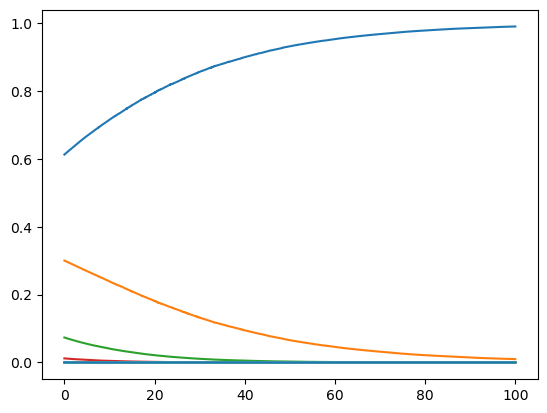

In [78]:
plot(tout, expect(projector(basisstate(b, 1)), psi_t))
plot(tout, expect(projector(basisstate(b, 2)), psi_t))
plot(tout, expect(projector(basisstate(b, 3)), psi_t))
plot(tout, expect(projector(basisstate(b, 4)), psi_t))
plot(tout, expect(projector(basisstate(b, 5)), psi_t))
plot(tout, expect(projector(basisstate(b, 6)), psi_t))
plot(tout, expect(projector(basisstate(b, 7)), psi_t))
plot(tout, expect(projector(basisstate(b, 8)), psi_t))
plot(tout, expect(projector(basisstate(b, 9)), psi_t))
plot(tout, expect(projector(basisstate(b, 10)), psi_t))
plot(tout, expect(projector(basisstate(b, 11)), psi_t))
PyPlot.display_figs()

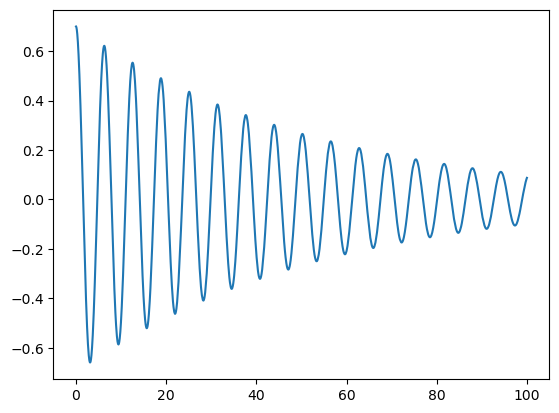

In [79]:
plot(tout, expect(a, psi_t))
PyPlot.display_figs()

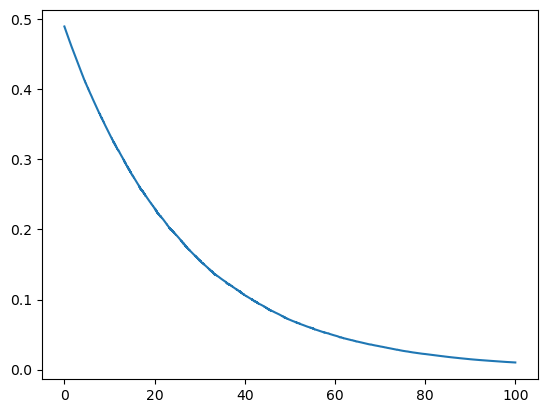

In [80]:
plot(tout, expect(dagger(a)*a, psi_t))
PyPlot.display_figs()